In [2]:
import rospy
import ros_numpy
import matplotlib.pyplot as plt
import numpy as np
from sensor_msgs.msg import Image as ImageMsg
from PIL import Image

rospy.init_node('collect_images', anonymous=True)

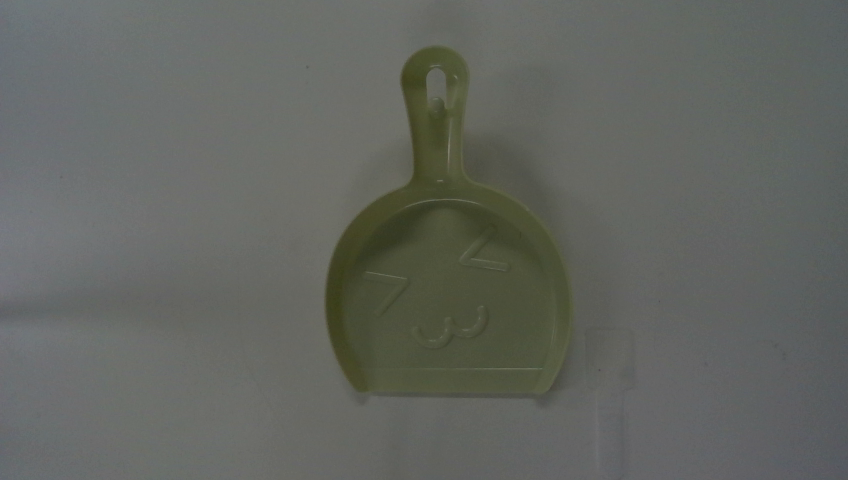

In [8]:
DIR = "dataset/scoop"

rgb_message_wrist = rospy.wait_for_message("d405/color/image_rect_raw", ImageMsg)
depth_message_wrist = rospy.wait_for_message("d405/aligned_depth_to_color/image_raw", ImageMsg)
rgb_data_wrist = ros_numpy.numpify(rgb_message_wrist)
depth_data_wrist = ros_numpy.numpify(depth_message_wrist)

rgb_image_wrist = Image.fromarray(rgb_data_wrist)
depth_image_wrist = Image.fromarray(depth_data_wrist)
rgb_image_wrist.save(f"{DIR}/wrist_rgb_ref.png")
depth_image_wrist.save(f"{DIR}/wrist_depth_ref.png")
rgb_image_wrist

In [9]:
from zipfile import ZipFile
import os

for i in range(50):
    rgb_message_wrist = rospy.wait_for_message("d405/color/image_rect_raw", ImageMsg)
    depth_message_wrist = rospy.wait_for_message("d405/aligned_depth_to_color/image_raw", ImageMsg)
    rgb_data_wrist = ros_numpy.numpify(rgb_message_wrist)
    depth_data_wrist = ros_numpy.numpify(depth_message_wrist)

    rgb_image_wrist = Image.fromarray(rgb_data_wrist)
    depth_image_wrist = Image.fromarray(depth_data_wrist)
    rgb_image_wrist.save(f"{DIR}/wrist_rgb_t0_rot0_{i+1}.png")
    depth_image_wrist.save(f"{DIR}/wrist_depth_t0_rot0_{i+1}.png")

# Create a zip file and add the images
zip_filename = f"{DIR}/t0_rot0.zip"
with ZipFile(zip_filename, 'w') as zipf:
    for i in range(50):
        rgb_filename = f"{DIR}/wrist_rgb_t0_rot0_{i+1}.png"
        depth_filename = f"{DIR}/wrist_depth_t0_rot0_{i+1}.png"
        zipf.write(rgb_filename)
        zipf.write(depth_filename)

# Remove the images after adding them to the zip file
for i in range(50):
    os.remove(f"{DIR}/wrist_rgb_t0_rot0_{i+1}.png")
    os.remove(f"{DIR}/wrist_depth_t0_rot0_{i+1}.png")

print(f"Zip file {zip_filename} created successfully.")


Zip file dataset/scoop/t0_rot0.zip created successfully.
